# Wilcoxon

## Summary

**description**
: "wilcoxon sign-rank"

## Results

### Setup the notebook

In [1]:
# import packages and modules
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [2]:
# set default seaborn theme
sns.set_theme()

In [3]:
# import custom modules not in root
sys.path[0] = "..\\"  # update path
from src import load  # noqa: E402

### Import the data

In [4]:
# get data
sleep_gain: pd.DataFrame = load.Data.get("sleep_gain")
sleep_gain.head()

,id,treatment,sleep_gain
0,1,Ltreatment,1.9
1,2,Ltreatment,0.8
2,3,Ltreatment,1.1
3,4,Ltreatment,0.1
4,5,Ltreatment,-0.1


In [5]:
# check dtypes
sleep_gain.dtypes

id              int64
treatment      object
sleep_gain    float64
dtype: object

In [6]:
# get samples
sleep_gain.sort_values(by=["id", "treatment"], inplace=True)
ltreat: np.array = sleep_gain.query(
    'treatment == "Ltreatment"')["sleep_gain"].to_numpy()
dtreat: np.array = sleep_gain.query(
    'treatment == "Dtreatment"')["sleep_gain"].to_numpy()
diff_treat: np.array = ltreat - dtreat

### Visualise the sample

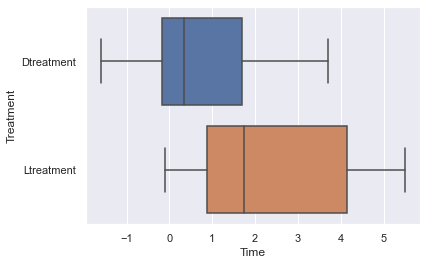

In [7]:
# boxplot of difference
ax = sns.boxplot(data=sleep_gain, x="sleep_gain", y="treatment")
ax.set(xlabel="Time", ylabel="Treatment")
plt.show()

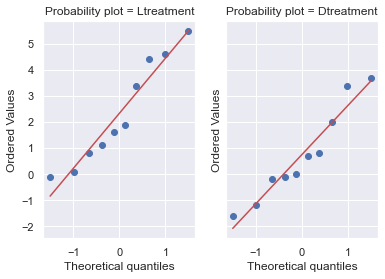

In [8]:
# probability plots
f, axs = plt.subplots(ncols=2, sharey=True)
stats.probplot(x=ltreat, plot=axs[0])
stats.probplot(x=dtreat, plot=axs[1])
axs[0].set(title="Probability plot = Ltreatment")
axs[1].set(title="Probability plot = Dtreatment")
plt.show()

### Analyse the data

In [9]:
# ltreat: check observations equal to 0
count: int = 0
for check in ltreat == 0:
    if check == True:
        count += 1
count

0

In [10]:
stats.wilcoxon(x=ltreat, alternative="greater")

WilcoxonResult(statistic=53.5, pvalue=0.0029296875)

In [11]:
# dtreat: check observations equal to 0
count: int = 0
for check in dtreat == 0:
    if check == True:
        count += 1
count

1

In [18]:
stats.wilcoxon(x=dtreat, alternative="greater")

WilcoxonResult(statistic=31.0, pvalue=0.1569690468874574)

In [13]:
# get difference
diff = ltreat - dtreat

In [19]:
stats.wilcoxon(x=diff_treat)

WilcoxonResult(statistic=0.0, pvalue=0.007632441648205508)